# 1D regression 
- Test QCL regressors with different circuit design
- Change scaling factor to fit sin 2x

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from QCLRegressor.testing.OneDimDataset import prepare_dataset,eval

plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'



loss 0.164272066323838
loss 0.112847522639920
loss 0.088871234862152
loss 0.076164082668336
loss 0.067098691414713
loss 0.054577700599189


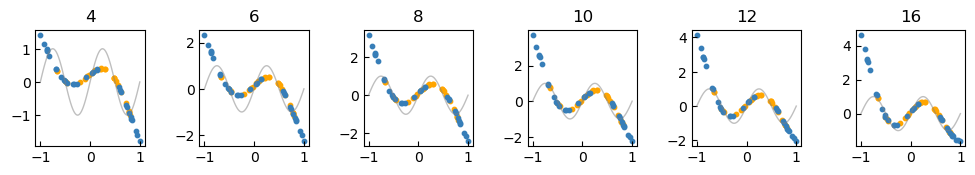

In [12]:
from QCLRegressor.regressors.StandardQCLRegressor import StandardQCLRegressor
from QCLRegressor.gates.CNOTRotationGates import CNOTRotationGates
from QCLRegressor.Encoders.XYEncoder import XYEncoder
from QCLRegressor.Encoders.prerocess import *
from QCLRegressor.gates.Observable import ZObservable



x_dim=1
n_qubit=2
depth=3
model_dict={}

for i in [4,6,8,10,12,16]:
    model_dict[f"{i}"]=StandardQCLRegressor(x_dim=x_dim,n_qubit=2,encoder=XYEncoder(2),vqe_gates=CNOTRotationGates(n_qubit=2,depth=3),observable=ZObservable(coeff=i,n_qubit=2))

n_cols=6
total_models=len(list(model_dict))
n_rows=int(total_models/n_cols)+1

for n in [60]:
    for mode in ["sin2"]:
        tr_X,tr_y,te_inner_X,te_inner_y,te_low_X,te_low_y,te_high_X,te_high_y,act_X,act_y=prepare_dataset(n_all_record=n,mode=mode,plot=False)
        i=0

        fig = plt.figure(figsize=(12,2*n_rows),dpi=100)
        for model_name,model in model_dict.items():
            model.fit(tr_X,tr_y)
            plt.subplots_adjust(wspace=0.5, hspace=0.6)
            ax = fig.add_subplot(n_rows, n_cols, i+1)
            eval(ax,model,tr_X,tr_y,te_inner_X,te_inner_y,te_low_X,te_low_y,te_high_X,te_high_y,act_X,act_y,title=model_name)
            i+=1

